In [1]:
from keras.applications import VGG16
import keras.backend as K
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Model

Using TensorFlow backend.


In [2]:
vgg = VGG16()

In [3]:
# Based on https://stackoverflow.com/questions/41711190/keras-how-to-get-the-output-of-each-layer
def layer_act_generator(model,start_at=1):
    inp = model.input                                           # input placeholder
    outputs = [layer.output for layer in model.layers[start_at:-4]]          # all layer outputs
    functor = K.function([inp, K.learning_phase()], outputs )   # evaluation function
    mod = Model(inp,outputs)
    
    return mod

get_act = layer_act_generator(vgg)

In [4]:
get_act.outputs

[<tf.Tensor 'block1_conv1/Relu:0' shape=(?, 224, 224, 64) dtype=float32>,
 <tf.Tensor 'block1_conv2/Relu:0' shape=(?, 224, 224, 64) dtype=float32>,
 <tf.Tensor 'block1_pool/MaxPool:0' shape=(?, 112, 112, 64) dtype=float32>,
 <tf.Tensor 'block2_conv1/Relu:0' shape=(?, 112, 112, 128) dtype=float32>,
 <tf.Tensor 'block2_conv2/Relu:0' shape=(?, 112, 112, 128) dtype=float32>,
 <tf.Tensor 'block2_pool/MaxPool:0' shape=(?, 56, 56, 128) dtype=float32>,
 <tf.Tensor 'block3_conv1/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 <tf.Tensor 'block3_conv2/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 <tf.Tensor 'block3_conv3/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 <tf.Tensor 'block3_pool/MaxPool:0' shape=(?, 28, 28, 256) dtype=float32>,
 <tf.Tensor 'block4_conv1/Relu:0' shape=(?, 28, 28, 512) dtype=float32>,
 <tf.Tensor 'block4_conv2/Relu:0' shape=(?, 28, 28, 512) dtype=float32>,
 <tf.Tensor 'block4_conv3/Relu:0' shape=(?, 28, 28, 512) dtype=float32>,
 <tf.Tensor 'block4_pool/MaxPool:0' sh

In [5]:
# Based on https://stackoverflow.com/questions/39382412/crop-center-portion-of-a-numpy-image
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

In [6]:
stim_seq = sio.loadmat('../stimulus_sequence.mat')['stimulus_sequence']

In [7]:
dat = sio.loadmat('../02.mat')
images = dat['images']

In [8]:
small_idxs = np.arange(0,540,2)
lg_idxs = np.arange(0,540,2)+1
sm_ims = [im.tolist()[0] for im in images[:,small_idxs].reshape(270,1)]
lg_ims = [im.tolist()[0] for im in images[:,lg_idxs].reshape(270,1)]
vgg_ims = [crop_center(im,224,224) for im in sm_ims]

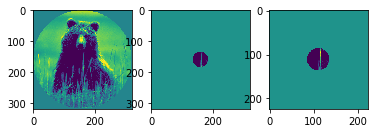

In [9]:
fig,axs = plt.subplots(1,3)
axs[0].imshow(lg_ims[0])
axs[1].imshow(sm_ims[0])
axs[2].imshow(vgg_ims[0])

In [10]:
vgg_ims = np.array([np.stack([im,im,im],axis=2) for im in vgg_ims])
vgg_ims.shape

(270, 224, 224, 3)

In [11]:
outs = get_act.predict(vgg_ims,batch_size=32)

In [46]:
outs_flat = [o.reshape(270,np.prod(o.shape[1:])) for o in outs]

In [47]:
[o.shape for o in outs_flat]

[(270, 3211264),
 (270, 3211264),
 (270, 802816),
 (270, 1605632),
 (270, 1605632),
 (270, 401408),
 (270, 802816),
 (270, 802816),
 (270, 802816),
 (270, 200704),
 (270, 401408),
 (270, 401408),
 (270, 401408),
 (270, 100352),
 (270, 100352),
 (270, 100352),
 (270, 100352),
 (270, 25088)]

In [48]:
for i,arr in zip(np.arange(len(outs))+1,outs_flat):
    cwd = os.getcwd()
    path = os.path.join(cwd,'vgg_activations_flat','layer_'+str(i))
    print('saving...',path)
    print(arr.shape)
    np.save(path,arr)

saving... /home/elijahc/Dropbox/Kohn_Monkey_Data/vgg_activations/vgg_activations_flat/layer_1
(270, 3211264)
saving... /home/elijahc/Dropbox/Kohn_Monkey_Data/vgg_activations/vgg_activations_flat/layer_2
(270, 3211264)
saving... /home/elijahc/Dropbox/Kohn_Monkey_Data/vgg_activations/vgg_activations_flat/layer_3
(270, 802816)
saving... /home/elijahc/Dropbox/Kohn_Monkey_Data/vgg_activations/vgg_activations_flat/layer_4
(270, 1605632)
saving... /home/elijahc/Dropbox/Kohn_Monkey_Data/vgg_activations/vgg_activations_flat/layer_5
(270, 1605632)
saving... /home/elijahc/Dropbox/Kohn_Monkey_Data/vgg_activations/vgg_activations_flat/layer_6
(270, 401408)
saving... /home/elijahc/Dropbox/Kohn_Monkey_Data/vgg_activations/vgg_activations_flat/layer_7
(270, 802816)
saving... /home/elijahc/Dropbox/Kohn_Monkey_Data/vgg_activations/vgg_activations_flat/layer_8
(270, 802816)
saving... /home/elijahc/Dropbox/Kohn_Monkey_Data/vgg_activations/vgg_activations_flat/layer_9
(270, 802816)
saving... /home/elijahc/

In [21]:
pickle.dump(outs[18],)

TypeError: file must have a 'write' attribute

In [34]:
gabor_act_02 = sio.loadmat('/home/elijahc/dev/sparse_Gabors_for_Will/02_gabor_activations.mat')

In [42]:
gabor_act_02['activity']

array([[1.7 , 0.85, 0.4 , ..., 0.85, 0.  , 0.1 ],
       [1.45, 0.8 , 0.15, ..., 0.8 , 0.25, 0.15],
       [1.3 , 0.7 , 0.2 , ..., 0.75, 0.2 , 0.25],
       ...,
       [0.95, 0.1 , 0.4 , ..., 0.65, 0.1 , 0.2 ],
       [1.05, 0.25, 1.7 , ..., 0.55, 0.3 , 0.7 ],
       [0.6 , 0.35, 0.7 , ..., 0.75, 0.15, 0.15]])

In [ ]:
np.save()